In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
# import ptitprince as pt

In [4]:
iris = sl.datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df["target"] = iris.target
df["species"] = df["target"].apply(lambda x: iris.target_names[x])

In [5]:
print(f"Dataframe size: {df.shape[0]}x{df.shape[1]}")
print(f"Count of features: {len(iris.feature_names)}")
print(f"Num classes: {len(df["target"].unique())}")
print("Class counts:")
for name, count in zip(*np.unique(df["species"], return_counts=True)):
    print(f" - {name}: {count}")
null_values_count = df.isnull().sum().sum()
print(f"Null values: {null_values_count} ({(df.isnull().sum().sum() / df.size * 100):.2f}%)")

if null_values_count > 0:
    df = df.dropna().reset_index(drop=True)

Dataframe size: 150x6
Count of features: 4
Num classes: 3
Class counts:
 - setosa: 50
 - versicolor: 50
 - virginica: 50
Null values: 0 (0.00%)


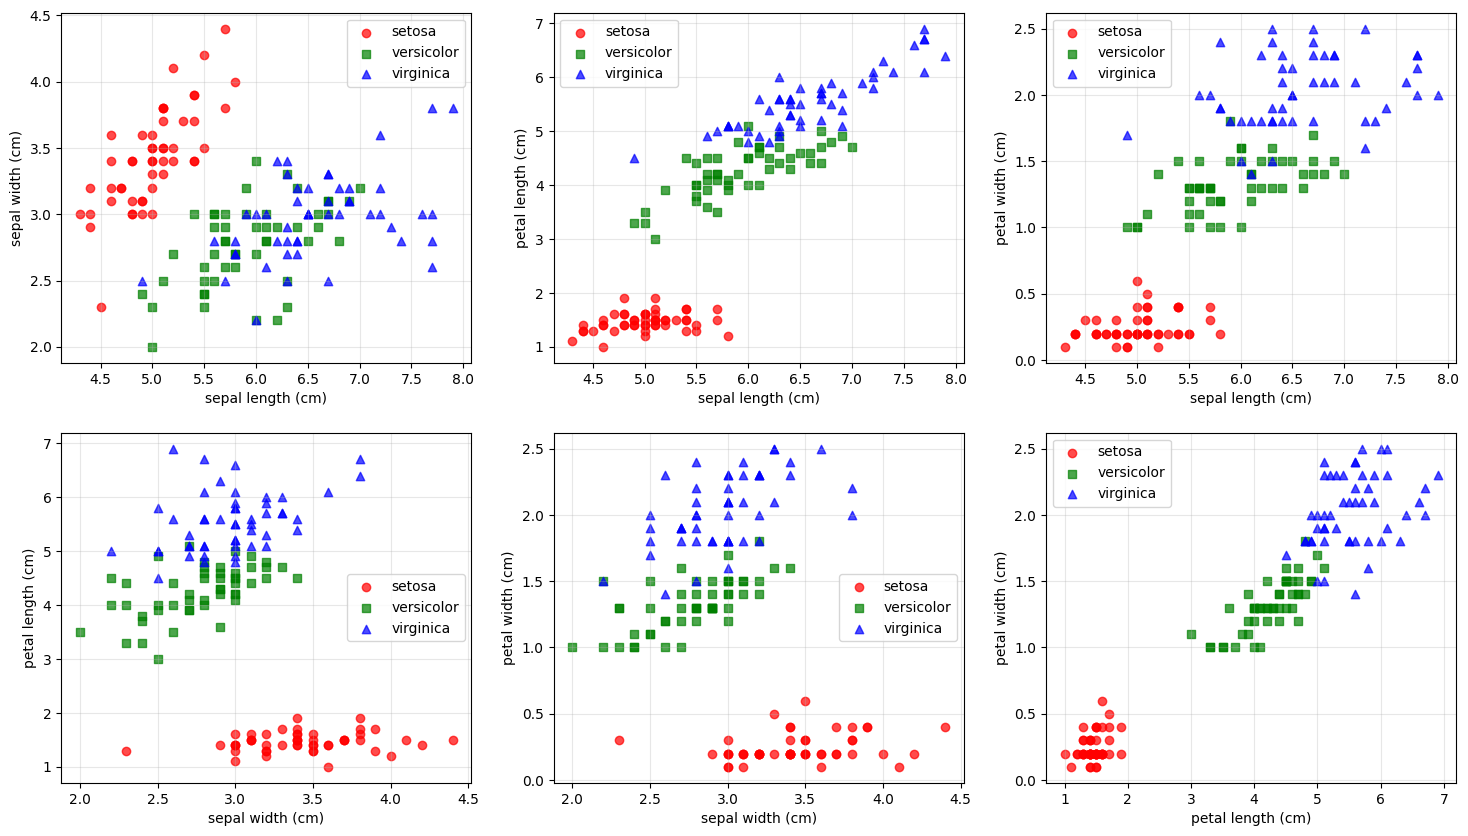

In [47]:
count_of_features = 4
columns = df.columns

nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

styles = ["o", "s", "^"]
colors = ["red", "green", "blue"]

idx = 0
for i in range(count_of_features):
    for j in range(i + 1, count_of_features):
        data_to_show = np.array(df[[columns[i], columns[j], "target"]])
        lax = ax[idx // ncols][idx % ncols]
        for group in np.unique(data_to_show[..., -1]):
            local_data = data_to_show[data_to_show[..., -1] == group]
            lax.scatter(
                local_data[..., 0],
                local_data[..., 1],
                marker=styles[int(group)],
                color=colors[int(group)],
                alpha=0.7,
                label=iris.target_names[int(group)])
        lax.set_xlabel(columns[i])
        lax.set_ylabel(columns[j])
        lax.grid(True, alpha=0.3)
        ax[idx // ncols][idx % ncols].legend()
        idx += 1


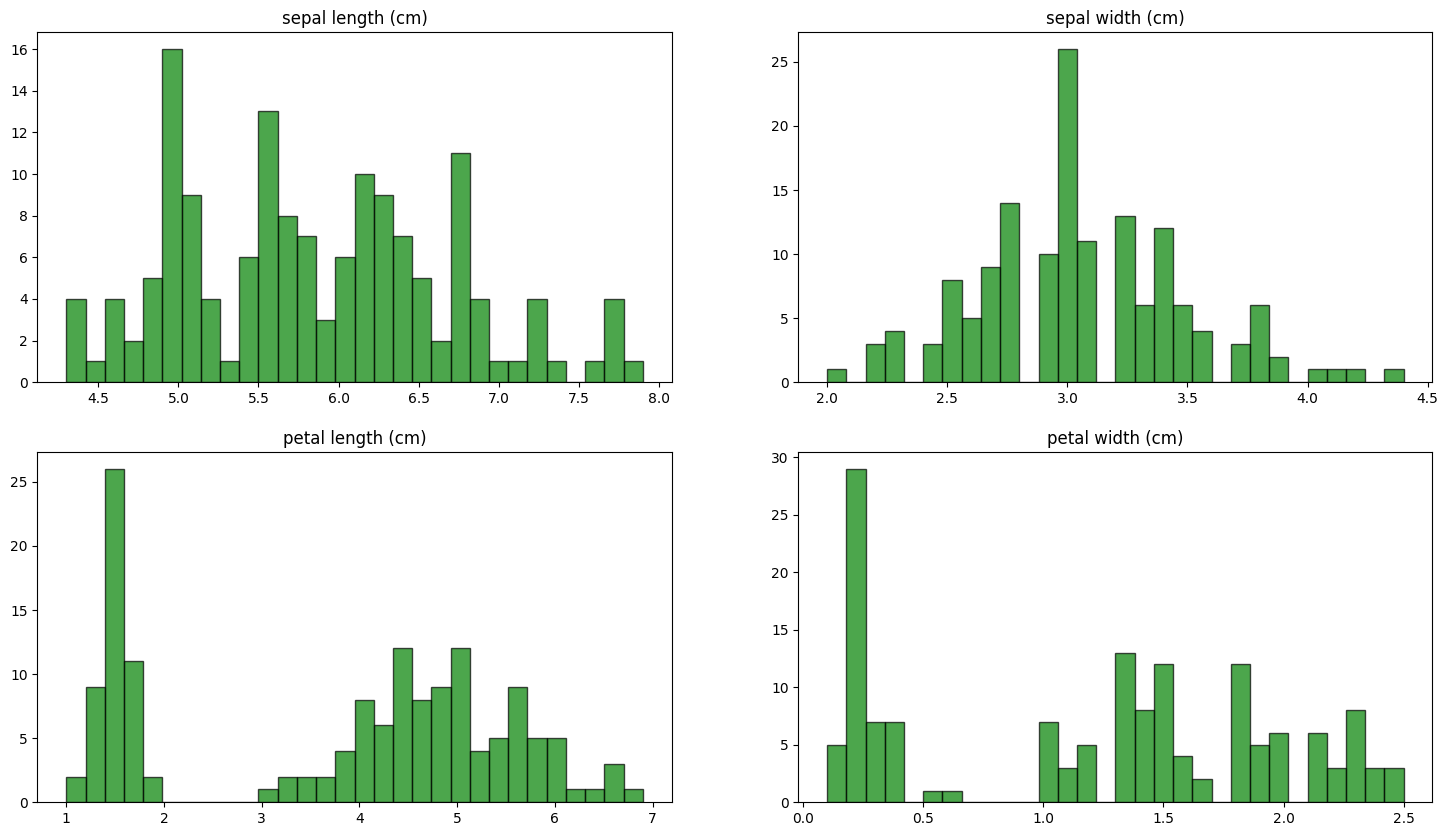

In [51]:
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

for i in range(count_of_features):
    data_to_show = df[columns[i]]
    ax[i // ncols][i % ncols].set_title(columns[i])
    ax[i // ncols][i % ncols].hist(data_to_show, bins=30, color="green", edgecolor="black", alpha=0.7)